# Q & A

Background

Highlight foods that are high in unhealthy components such as saturated fats, added sugars, which can contribute to diet-related health issues like obesity, cardiovascular diseases, and diabetes.

The excessive levels of certain nutrients in the problematic foods may indicate imbalances or deficiencies in other essential nutrients. For example, foods high in calories but low in essential vitamins and minerals may contribute to malnutrition and nutrient deficiencies.

Provide insights into the nutrient profiles of the problematic foods, which can be used to assess their overall nutritional quality and potential impact on malnutrition-related health issues.

#### Cycle 1

- Which food group has the highest average energy content? 
       Beef Products
 - How does the energy (kcal) content vary across different food groups? 
        Beef Products are the highest with over 800kcal followed by baked and Vegetable Products which are just under 800kcal
- Are there significant differences in protein, fat, and carbohydrate levels between food groups?
            Beef Products,Pork and Poultry  has the most protein
- Which food groups tend to have higher or lower energy content?
    Spice and Herbs have the lowest energy level
    
- Are there any foods that exceed the recommended daily allowance (RDA)?
    The average of the nutrientvalues recorded exceeds the RDA for most. This might be a result of outliers or simply an excess.
- Are there any significant correlation between dietary fiber while being low in calories?
    There is a slight correlation as for some foods as calorie increases the amount of fiber also increases but this is more so common in foods with higher calorie content
    
- Is there a correlation between the energy content and the amount of carbohydrates in the food?
    It can be concluded that there is a positive corellation between energy content and carbohydrates.
    
- What is the overall distribution of energy (kcal) in the dataset?
    There is a high frequency of the energy content above 1000 kcal but less than 1200 kcal recorded
    
- Are there any outliers or extreme values in the energy content?

- How is the energy distribution skewed or spread out?
    The distribution of energy has a positive skew
    
- Average nutrient values for Problematic Foods (Fats and Oils + Desserts)
    * Calorie (kcal): 131.12
    * Protein (g): 4.84
    * Carbs (g) : 16.63
    * Sugar (g): 2.52



# ETL

### Extraction
    - Retrieve Nutrient data from online source 
    (link to all data sources in the readme)
    
### Transformation
    - Do some eda
        - Check datatypes
        - Deal with nulls
        - Deal with conflicting data types
    
### Load
    - Use normalized data to perform data analysis
        - create predictive ML models
        - Create visualizations to answer questions

### EDA
This note book looks through different csv files containing nutrient data. The hope is to link it with health issues including but not limited to Malnutrition and Obesity.

It will focus on one file per "cycle"



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import requests
from PIL import Image



df = pd.read_csv('data/nndb_flat.csv')
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [2]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617
ID,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,44258,44259,44260,48052,80200,83110,90240,90480,90560,93600
FoodGroup,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,...,Sweets,Sweets,Sweets,Cereal Grains and Pasta,Finfish and Shellfish Products,Finfish and Shellfish Products,Finfish and Shellfish Products,Sweets,Finfish and Shellfish Products,Finfish and Shellfish Products
ShortDescrip,"BUTTER,WITH SALT","BUTTER,WHIPPED,WITH SALT","BUTTER OIL,ANHYDROUS","CHEESE,BLUE","CHEESE,BRICK","CHEESE,BRIE","CHEESE,CAMEMBERT","CHEESE,CARAWAY","CHEESE,CHEDDAR","CHEESE,CHESHIRE",...,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX","PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,REG,DRY MIX","PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",VITAL WHEAT GLUTEN,"FROG LEGS,RAW","MACKEREL,SALTED","SCALLOP,(BAY&SEA),CKD,STMD","SYRUP,CANE","SNAIL,RAW","TURTLE,GREEN,RAW"
Descrip,"Butter, salted","Butter, whipped, with salt","Butter oil, anhydrous","Cheese, blue","Cheese, brick","Cheese, brie","Cheese, camembert","Cheese, caraway","Cheese, cheddar","Cheese, cheshire",...,"Puddings, chocolate flavor, low calorie, regul...","Puddings, all flavors except chocolate, low ca...","Puddings, all flavors except chocolate, low ca...",Vital wheat gluten,"Frog legs, raw","Fish, mackerel, salted","Mollusks, scallop, (bay and sea), cooked, steamed","Syrup, Cane","Mollusks, snail, raw","Turtle, green, raw"
CommonName,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MfgName,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScientificName,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy_kcal,717.0,717.0,876.0,353.0,371.0,334.0,300.0,376.0,406.0,387.0,...,365.0,351.0,350.0,370.0,73.0,305.0,111.0,269.0,90.0,89.0
Protein_g,0.85,0.85,0.28,21.4,23.24,20.75,19.8,25.18,24.04,23.37,...,10.08,1.6,0.81,75.16,16.4,18.5,20.54,0.0,16.1,19.8
Fat_g,81.11,81.11,99.48,28.74,29.68,27.68,24.26,29.2,33.82,30.6,...,3.0,0.1,0.9,1.85,0.3,25.1,0.84,0.0,1.4,0.5


#### Checking datatypes

In [3]:
df['CommonName'].value_counts().isnull()

hamburger                                                      False
KFC                                                            False
family style                                                   False
buffalo                                                        False
soft drink, pop, soda                                          False
                                                               ...  
URMIS # 1369                                                   False
URMIS # 01369                                                  False
URMIS #2237, Sirloin Steak, Sirloin strip                      False
URMIS # 1404, Club Steak, Kansas City Strip, New York Strip    False
french, family style                                           False
Name: CommonName, Length: 443, dtype: bool

In [4]:
df.dtypes

ID                    int64
FoodGroup            object
ShortDescrip         object
Descrip              object
CommonName           object
MfgName              object
ScientificName       object
Energy_kcal         float64
Protein_g           float64
Fat_g               float64
Carb_g              float64
Sugar_g             float64
Fiber_g             float64
VitA_mcg            float64
VitB6_mg            float64
VitB12_mcg          float64
VitC_mg             float64
VitE_mg             float64
Folate_mcg          float64
Niacin_mg           float64
Riboflavin_mg       float64
Thiamin_mg          float64
Calcium_mg          float64
Copper_mcg          float64
Iron_mg             float64
Magnesium_mg        float64
Manganese_mg        float64
Phosphorus_mg       float64
Selenium_mcg        float64
Zinc_mg             float64
VitA_USRDA          float64
VitB6_USRDA         float64
VitB12_USRDA        float64
VitC_USRDA          float64
VitE_USRDA          float64
Folate_USRDA        

### Dealing with nulls

In [5]:
df.isna()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8614,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8615,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8616,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# notcommited to this step as it might cause wrong data brought forward 
for col in df:
    if df[col].isnull().sum() > 0:
        try:
            df[col].fillna(df[col].mean(), inplace = True)
        except:
            df[col].fillna(df[col].mode()[0],inplace = True)


df


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",hamburger,"Kellogg, Co.",Phaseolus vulgaris,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",hamburger,"Kellogg, Co.",Phaseolus vulgaris,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",hamburger,"Kellogg, Co.",Phaseolus vulgaris,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",hamburger,"Kellogg, Co.",Phaseolus vulgaris,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",hamburger,"Kellogg, Co.",Phaseolus vulgaris,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",hamburger,"Kellogg, Co.",Phaseolus vulgaris,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",hamburger,"Kellogg, Co.",Phaseolus vulgaris,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",hamburger,"Kellogg, Co.",Phaseolus vulgaris,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",hamburger,"Kellogg, Co.",Phaseolus vulgaris,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [7]:
df = pd.get_dummies(df, columns=['ScientificName'])
df = pd.get_dummies(df, columns=['FoodGroup'])

df.columns.value_counts()

ID                                                                                1
ScientificName_Passiflora edulis f. flavicarpa                                    1
ScientificName_Phyllostachys spp.                                                 1
ScientificName_Phoenix dactylifera                                                1
ScientificName_Phasianus colchicus                                                1
                                                                                 ..
ScientificName_Collinsonia canadensis                                             1
ScientificName_Cocos nucifera                                                     1
ScientificName_Clupea harengus pallasi Valenciennes & Macrocystis integrifolia    1
ScientificName_Clupea harengus pallasi Valenciennes                               1
FoodGroup_Vegetables and Vegetable Products                                       1
Length: 537, dtype: int64

### Dealing with categorical data

### Trying a predictive model

In [102]:
# X1 = df.drop(['ID', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName','Energy_kcal'], axis=1)
X1 = df[["Protein_g", "Carb_g", "Sugar_g","Fat_g"]]

y = df['Energy_kcal']

#spli into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)



In [9]:
X1.columns

Index(['Protein_g', 'Carb_g', 'Sugar_g', 'Fat_g'], dtype='object')

In [103]:
# Create and train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth=10, min_samples_split=5,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 282.7778172849722
R^2 Score: 0.9901997261946115


In [100]:
# Make predictions on the test set
y_pred_train = rf_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2) #0.81 w/o Fat_g


Mean Squared Error: 282.7778172849722
R^2 Score: 0.9942551670715334


In [106]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train the model
model1_2 = LinearRegression()
model1_2.fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {model1_2.score(X_train, y_train)}')

print(f'Testing Score: {model1_2.score(X_test, y_test)}')


Training Score: 0.9888173486145652
Testing Score: 0.9921798494498929


## Visualizations

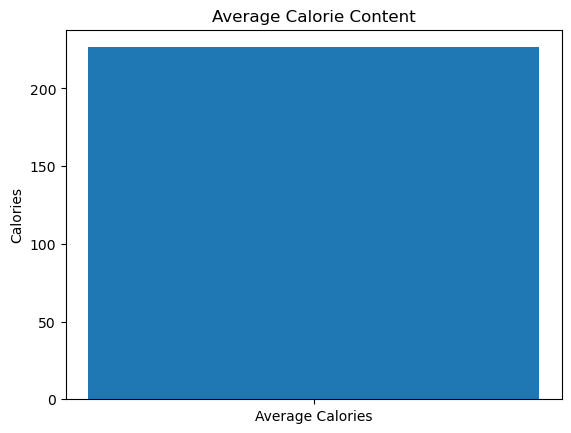

In [12]:
# Question 1: Average Calorie Content
average_calories = df['Energy_kcal'].mean()

# Bar chart for Average Calorie Content
plt.bar(['Average Calories'], [average_calories])
plt.ylabel('Calories')
plt.title('Average Calorie Content')
plt.show()

In [13]:
average_calories

226.43861684845672

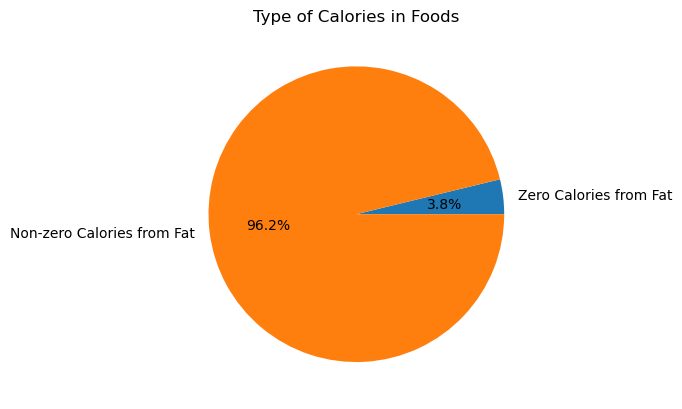

In [14]:
# Question 2: Count of Food Items with Zero Calories from Fat
zero_calories_from_fat_count = df[df['Fat_g'] == 0].shape[0]

# Pie chart for Count of Food Items with Zero Calories from Fat
labels = ['Zero Calories from Fat', 'Non-zero Calories from Fat']
sizes = [zero_calories_from_fat_count, df.shape[0] - zero_calories_from_fat_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Type of Calories in Foods')
plt.show()


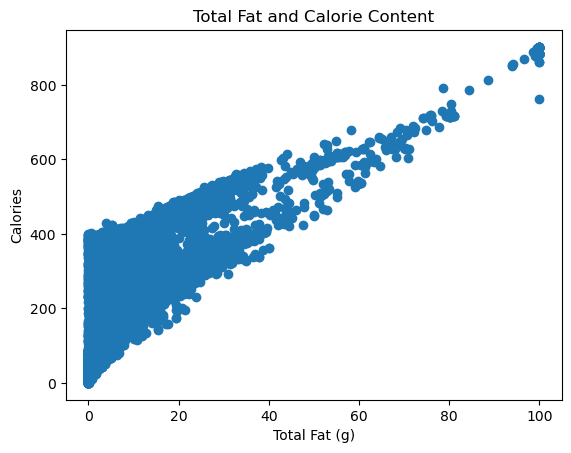

In [15]:
# Question 4: Correlation between Total Fat and Calorie Content
correlation = df['Fat_g'].corr(df['Energy_kcal'])

plt.scatter(df['Fat_g'], df['Energy_kcal'])
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.title('Total Fat and Calorie Content')
plt.show()

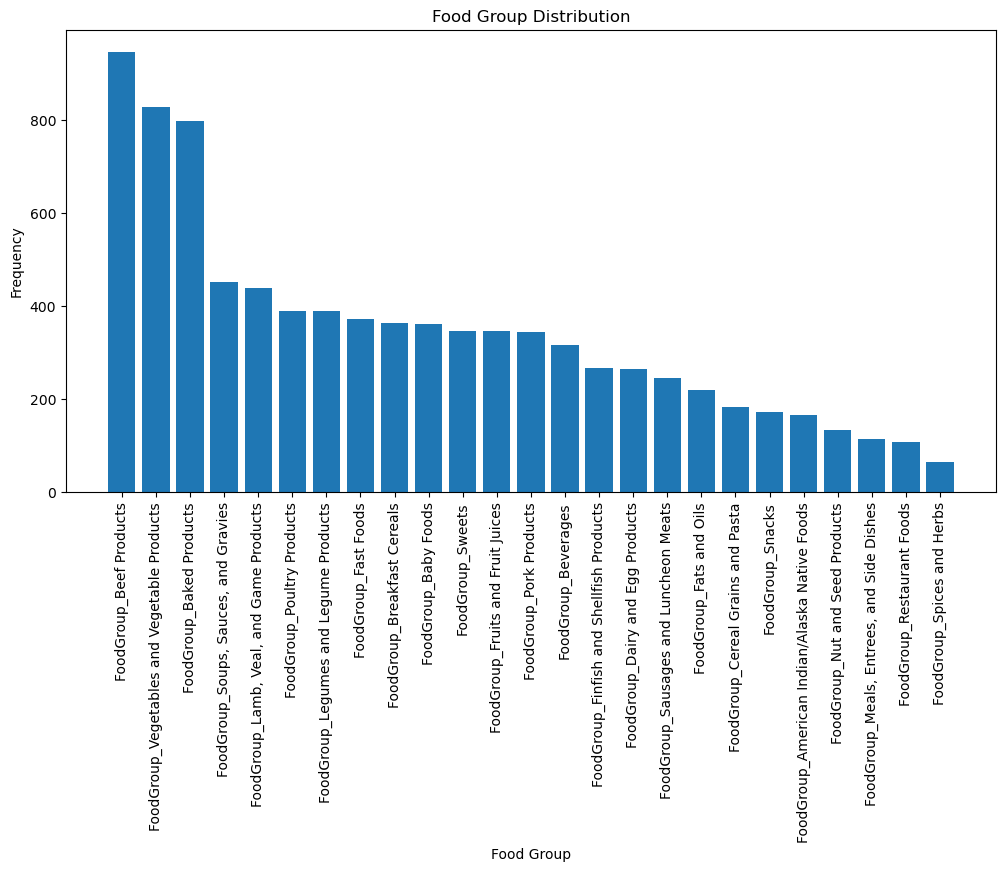

In [16]:
# #food group distribution

# Counting the frequency of each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
food_groups = df[food_group_columns].sum().sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(food_groups.index, food_groups.values)

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Food Group Distribution')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


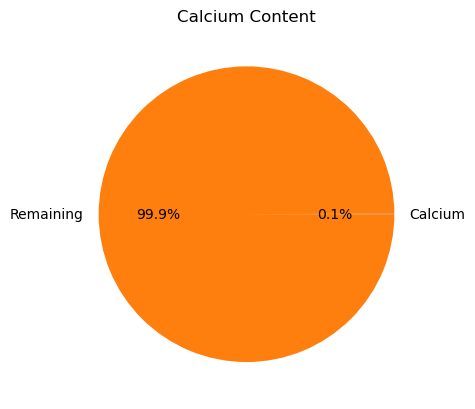

In [17]:
calcium = df['Calcium_USRDA'].mean()
plt.pie([calcium, 100 - calcium], labels=['Calcium', 'Remaining'], autopct='%1.1f%%')
plt.title('Calcium Content')
plt.show()


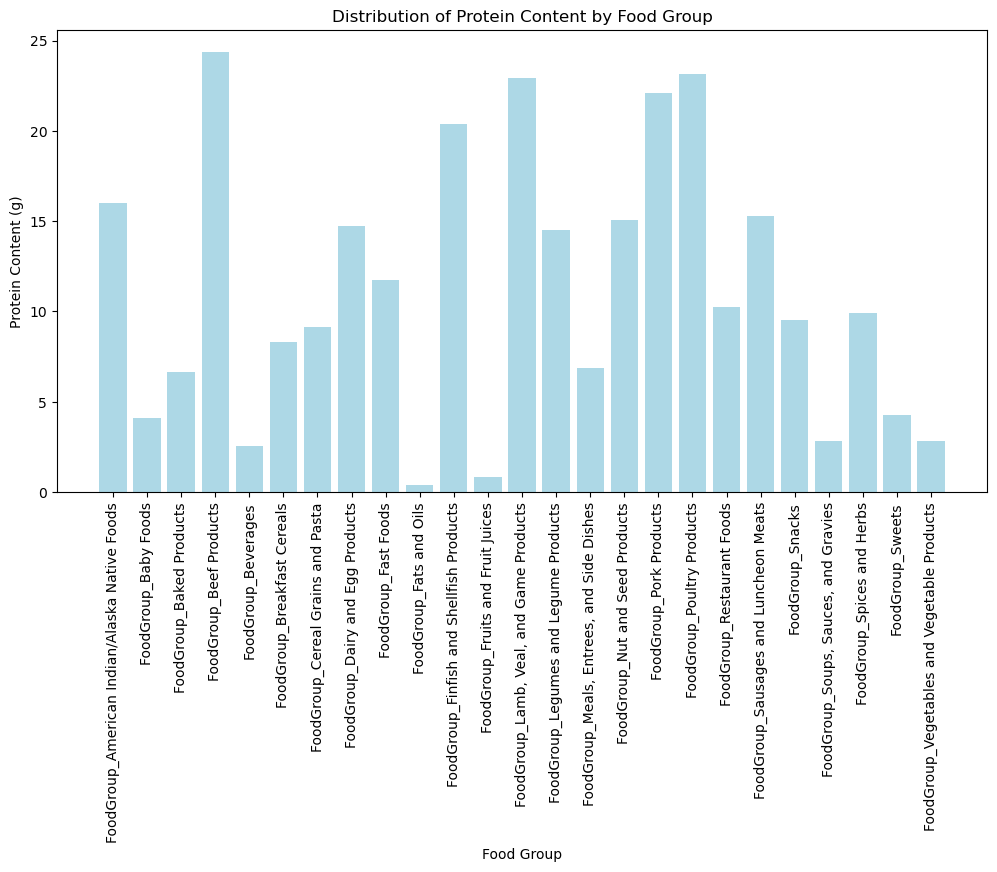

In [18]:
#distribution of protein

# Extracting the fat content values for each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
fat_values = [df.loc[df[col] == 1, 'Protein_g'] for col in food_group_columns]

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(food_group_columns, [value.mean() for value in fat_values], color='lightblue')

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Protein Content (g)')
plt.title('Distribution of Protein Content by Food Group')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


In [19]:
# Select the relevant columns for nutrient analysis
nutrient_columns = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']

# Calculate the nutrient summary
nutrient_summary = df[nutrient_columns].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Transpose the nutrient summary for better display
nutrient_summary = nutrient_summary.T

# Display the nutrient summary
nutrient_summary

,count,mean,std,min,25%,50%,75%,max
Energy_kcal,8618.0,226.438617,169.388910,0.0,93.0000,191.000,336.0000,902.00
Protein_g,8618.0,11.523910,10.550590,0.0,2.4700,8.285,19.9775,88.32
Fat_g,8618.0,10.647024,15.866353,0.0,0.9925,5.235,13.9000,100.00
Carb_g,8618.0,21.819062,27.239000,0.0,0.0400,8.945,32.9000,100.00
Sugar_g,8618.0,6.560253,13.602098,0.0,0.0000,0.370,5.3000,99.80


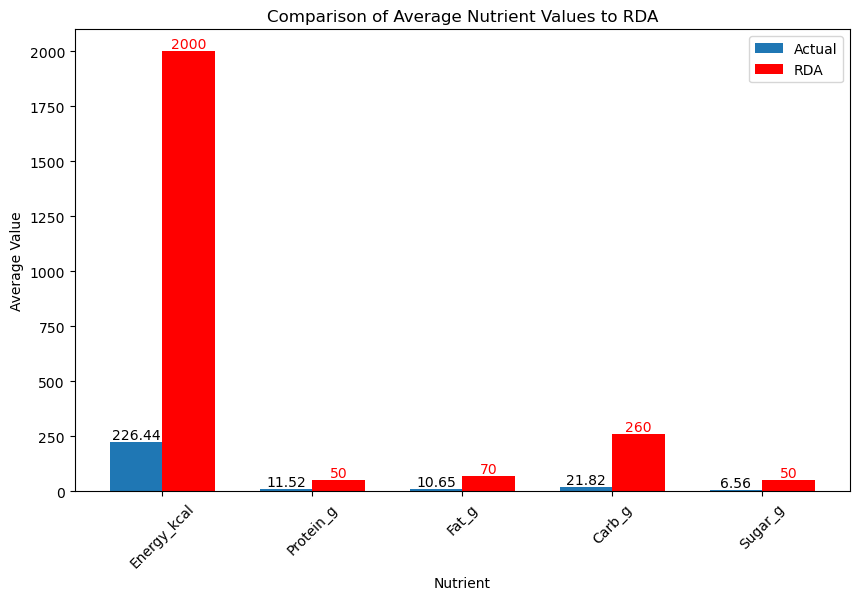

In [20]:
# Select the relevant columns for nutrient analysis
nutrient_columns = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']

# Calculate the average nutrient values
average_values = df[nutrient_columns].mean()

# Define RDA values for each nutrient
rda_values = {'Energy_kcal': 2000, 'Protein_g': 50, 'Fat_g': 70, 'Carb_g': 260, 'Sugar_g': 50}

# Create a list of nutrient labels
nutrient_labels = list(average_values.index)

# Create an array of positions for the bars
bar_positions = np.arange(len(nutrient_labels))

# Define the width of the bars
bar_width = 0.35

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
actual_bars = ax.bar(bar_positions, average_values, bar_width, label='Actual')
rda_bars = ax.bar(bar_positions + bar_width, list(rda_values.values()), bar_width, color='red', label='RDA')

# Add labels and title
ax.set_xlabel('Nutrient')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Average Nutrient Values to RDA')

# Add actual values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i], average_values[i], str(round(average_values[i], 2)), ha='center', va='bottom')

# Add RDA values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i] + bar_width, list(rda_values.values())[i], str(list(rda_values.values())[i]), ha='center', va='bottom', color='red')

# Adjust x-axis ticks and labels
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(nutrient_labels, rotation=45)

# Show the legend
ax.legend()

# Display the plot
plt.show()


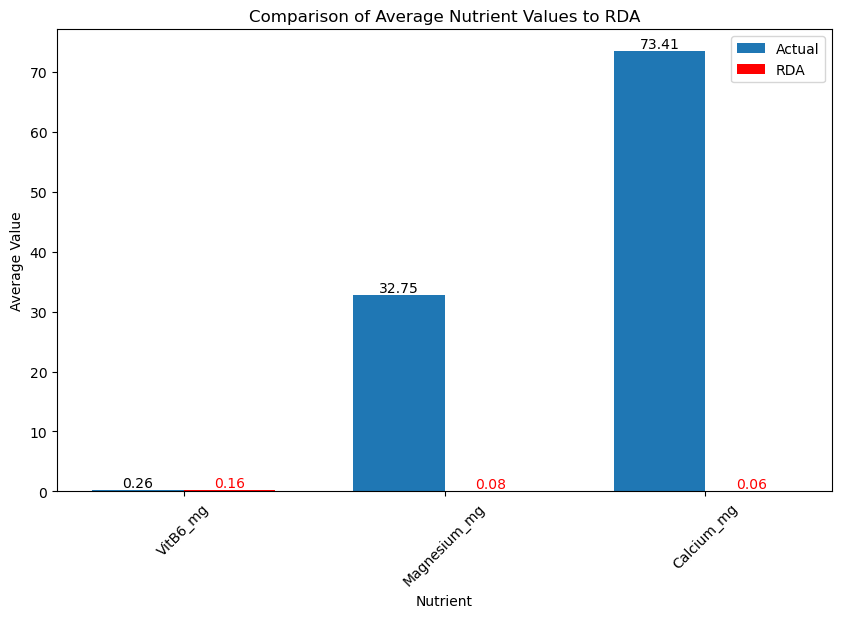

In [21]:
# Select the relevant columns for vitamin analysis
nutrient_columns = ['VitB6_mg', 'Magnesium_mg', 'Calcium_mg']

# Calculate the average vitamin values
average_values = df[nutrient_columns].mean()

# Create a list of vitamin labels
nutrient_labels = list(average_values.index)

# Define the RDA values for Iron, Magnesium, and Calcium
rda_values = df.loc[:, ['VitB6_USRDA', 'Magnesium_USRDA', 'Calcium_USRDA']].mean()

# Create an array of positions for the bars
bar_positions = np.arange(len(nutrient_labels))

# Define the width of the bars
bar_width = 0.35

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
actual_bars = ax.bar(bar_positions, average_values, bar_width, label='Actual')
rda_bars = ax.bar(bar_positions + bar_width, rda_values, bar_width, color='red', label='RDA')

# Add labels and title
ax.set_xlabel('Nutrient')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Average Nutrient Values to RDA')

# Add actual values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i], average_values[i], str(round(average_values[i], 2)), ha='center', va='bottom')

# Add RDA values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i] + bar_width, rda_values[i], str(round(rda_values[i], 2)), ha='center', va='bottom', color='red')

# Adjust x-axis ticks and labels
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(nutrient_labels, rotation=45)

# Show the legend
ax.legend()

# Display the plot
plt.show()


In [22]:
# Define the recommended allowances (RDA) for nutrients
rda_values = {'Energy_kcal': 2000, 'Protein_g': 50, 'Fat_g': 70, 'Carb_g': 260, 'Sugar_g': 50}

# Filter the rows in Table 1 that exceed the RDA or have high levels of unhealthy components
problematic_foods = df[(df['Energy_kcal'] > rda_values['Energy_kcal']) |
                       (df['Protein_g'] > rda_values['Protein_g']) |
                       (df['Fat_g'] > rda_values['Fat_g']) |
                       (df['Carb_g'] > rda_values['Carb_g']) |
                       (df['Sugar_g'] > rda_values['Sugar_g'])]

# Display the subset of problematic foods
problematic_foods


,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
0,1001,"BUTTER,WITH SALT","Butter, salted",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0
1,1002,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0
2,1003,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",hamburger,"Kellogg, Co.",876.0,0.28,99.48,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
62,1069,"CREAM SUBSTITUTE,POWDERED","Cream substitute, powdered",hamburger,"Kellogg, Co.",545.0,4.79,35.48,54.88,54.88,...,0,0,0,0,0,0,0,0,0,0
63,1070,"DESSERT TOPPING,POWDERED","Dessert topping, powdered",hamburger,"Kellogg, Co.",577.0,4.90,39.92,52.54,52.54,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598,43598,"MAYONNAISE DRSNG,NO CHOL","Mayonnaise dressing, no cholesterol",hamburger,"Kellogg, Co.",688.0,0.00,77.80,0.30,0.30,...,0,0,0,0,0,0,0,0,0,0
8599,44005,"OIL,CORN,PEANUT,AND OLIVE","Oil, corn, peanut, and olive",hamburger,"Kellogg, Co.",884.0,0.00,100.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
8600,44018,"SWEETENERS,TABLETOP,FRUCTOSE,LIQ","Sweeteners, tabletop, fructose, liquid",hamburger,"Kellogg, Co.",279.0,0.00,0.00,76.10,76.00,...,0,0,0,0,0,0,0,0,1,0
8611,48052,VITAL WHEAT GLUTEN,Vital wheat gluten,hamburger,"Kellogg, Co.",370.0,75.16,1.85,13.79,0.00,...,0,0,0,0,0,0,0,0,0,0


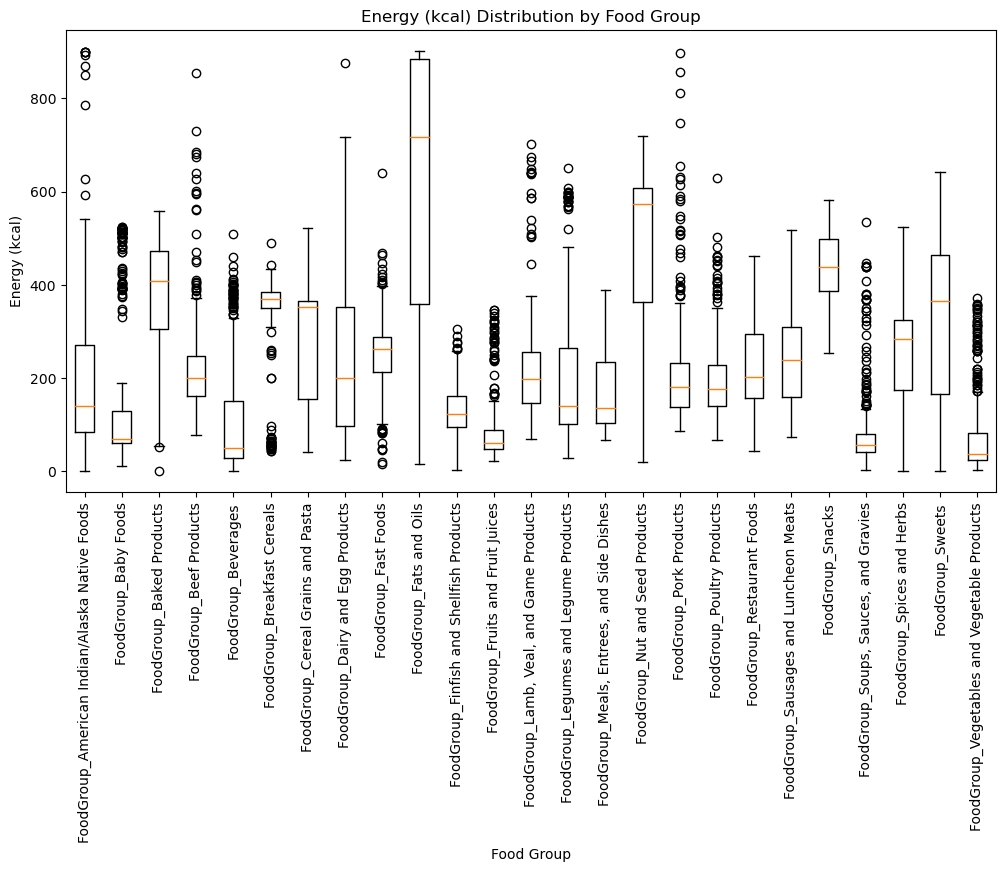

In [23]:
#Distribution of Energy by food group

# Extracting the energy (kcal) values for each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
energy_values = [df.loc[df[col] == 1, 'Energy_kcal'] for col in food_group_columns]

# Creating the box and whisker plot
plt.figure(figsize=(12, 6))
plt.boxplot(energy_values, labels=food_group_columns)

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Energy (kcal)')
plt.title('Energy (kcal) Distribution by Food Group')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


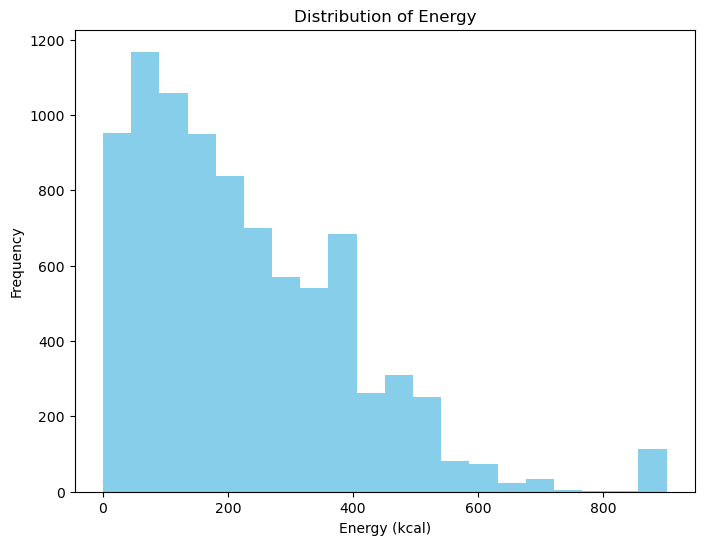

In [24]:
#distribution of energy in the dataset
plt.figure(figsize=(8, 6))
plt.hist(df['Energy_kcal'], bins=20, color='skyblue')
plt.xlabel('Energy (kcal)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()


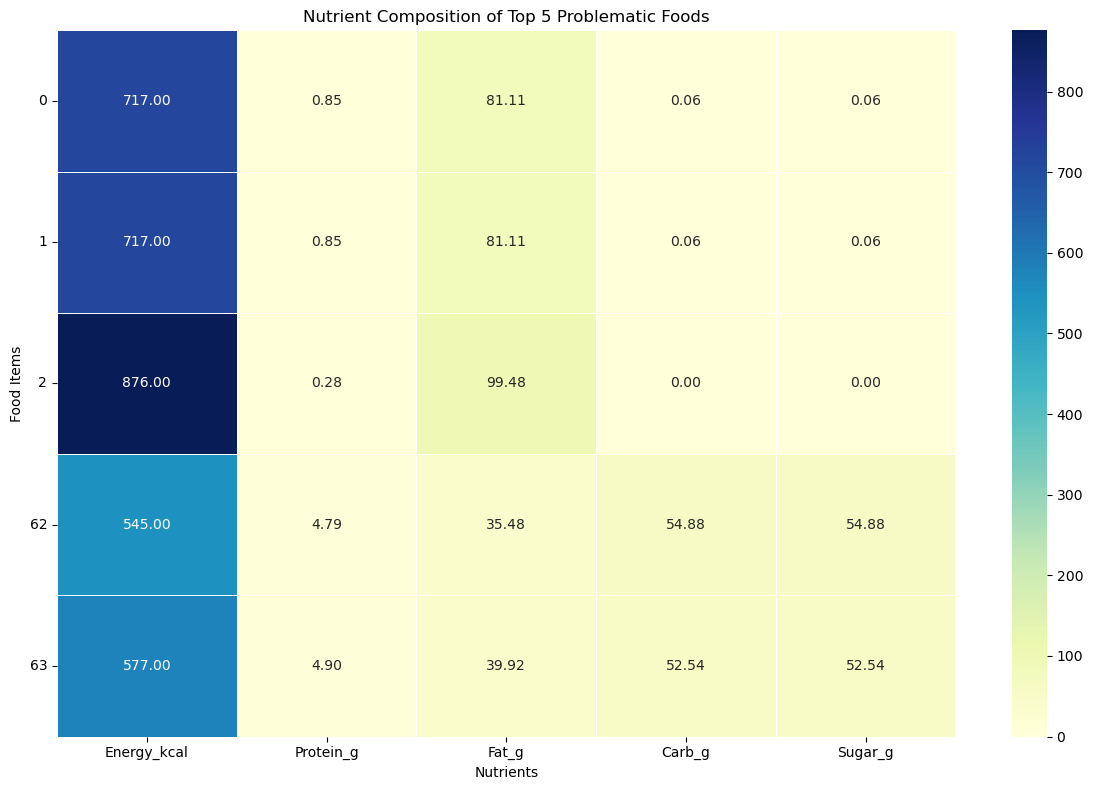

In [25]:
# Subset the problematic foods with the nutrient columns
problematic_nutrients = problematic_foods[nutrient_columns]

# Select the top 5 problematic food items
top_problematic_foods = problematic_foods.head(5)

# Select the nutrient columns for the heatmap
nutrient_columns = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']

# Subset the problematic foods with the nutrient columns
problematic_nutrients = top_problematic_foods[nutrient_columns]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(problematic_nutrients, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)

# Add labels and title
plt.xlabel('Nutrients')
plt.ylabel('Food Items')
plt.title('Nutrient Composition of Top 5 Problematic Foods')

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()



# Display the heatmap
plt.show()

In [26]:
# IDs = [0,1,2,62,63]

# # Getting the correct IDs by adding 1001 to each
# modified_ids = [id + 1001 for id in IDs]

# names = df[df['ID'] == 1001]['CommonName'].tolist()

# names

IDs = [1001, 1002, 1069, 1070]

# Retrieve the output for each ID
for id in IDs:
    output = df[df['ID'] == id]
    display(output)

,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
0,1001,"BUTTER,WITH SALT","Butter, salted",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0


,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
1,1002,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0


,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
62,1069,"CREAM SUBSTITUTE,POWDERED","Cream substitute, powdered",hamburger,"Kellogg, Co.",545.0,4.79,35.48,54.88,54.88,...,0,0,0,0,0,0,0,0,0,0


,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
63,1070,"DESSERT TOPPING,POWDERED","Dessert topping, powdered",hamburger,"Kellogg, Co.",577.0,4.9,39.92,52.54,52.54,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df['CommonName'].value_counts()

hamburger                            7580
KFC                                    22
family style                           21
soft drink, pop, soda                  13
buffalo                                13
                                     ... 
includes Capri Sun                      1
includes Caprisun Roarin' Waters        1
ricemilk, rice milk                     1
Includes USDA commodity food A086       1
french, family style                    1
Name: CommonName, Length: 443, dtype: int64

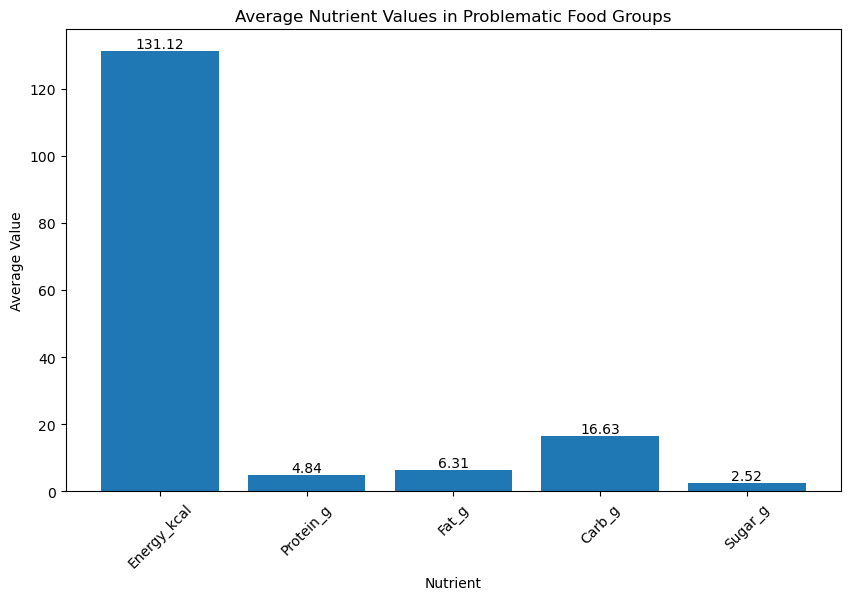

In [28]:
# Define the problematic food groups
food_groups = ['FoodGroup_Nut and Seed Products', 'FoodGroup_Spices and Herbs', 'FoodGroup_Vegetables and Vegetable Products']

# Filter Table 1 to include only the specified food groups and problematic nutrients
filtered_df = df[df[food_groups].any(axis=1)][['FoodGroup_Nut and Seed Products', 'FoodGroup_Spices and Herbs', 'FoodGroup_Vegetables and Vegetable Products',
                                               'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']]

# Calculate the average nutrient values for the problematic food groups
average_values = filtered_df[['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(average_values.index, average_values.values)

# Add labels and title
plt.xlabel('Nutrient')
plt.ylabel('Average Value')
plt.title('Average Nutrient Values in Problematic Food Groups')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Display the plot
plt.show()



## Possible link to Crop dataset

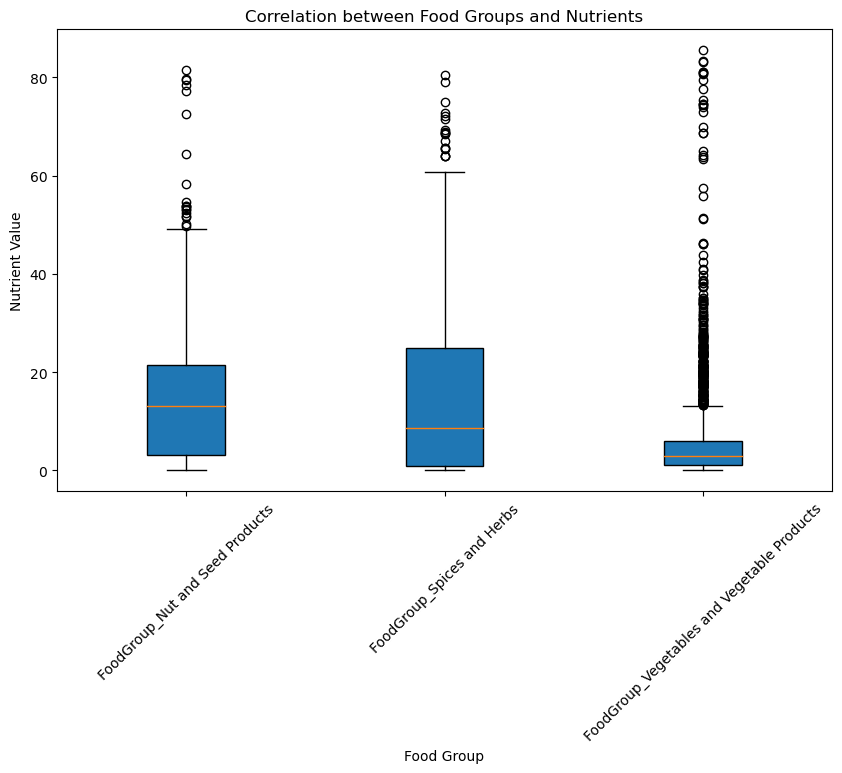

In [29]:
# Select the relevant columns for food groups and nutrients
food_group_columns = ['FoodGroup_Nut and Seed Products', 'FoodGroup_Spices and Herbs', 'FoodGroup_Vegetables and Vegetable Products']
nutrient_columns = ['Protein_g', 'Carb_g', 'Sugar_g']

# Subset the data for the specified food groups and nutrient columns
subset_data = df[food_group_columns + nutrient_columns]

# Create a color dictionary for food groups
color_dict = {
    'FoodGroup_Nut and Seed Products': 'blue',
    'FoodGroup_Spices and Herbs': 'green',
    'FoodGroup_Vegetables and Vegetable Products': 'red'
}

# Create a list to store the data for each food group
data_list = []

# Populate the data list with the subsets for each food group
for food_group in food_group_columns:
    data = subset_data.loc[subset_data[food_group] == 1, nutrient_columns]
    data_list.append(data.values.flatten())

# Create the box and whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_list, labels=food_group_columns, patch_artist=True)


# Set colors for each box
for patch, color in zip(plt.gca().artists, [color_dict[food_group] for food_group in food_group_columns]):
    patch.set_facecolor(color)

plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Food Group')
plt.ylabel('Nutrient Value')
plt.title('Correlation between Food Groups and Nutrients')

# Display the plot
plt.show()


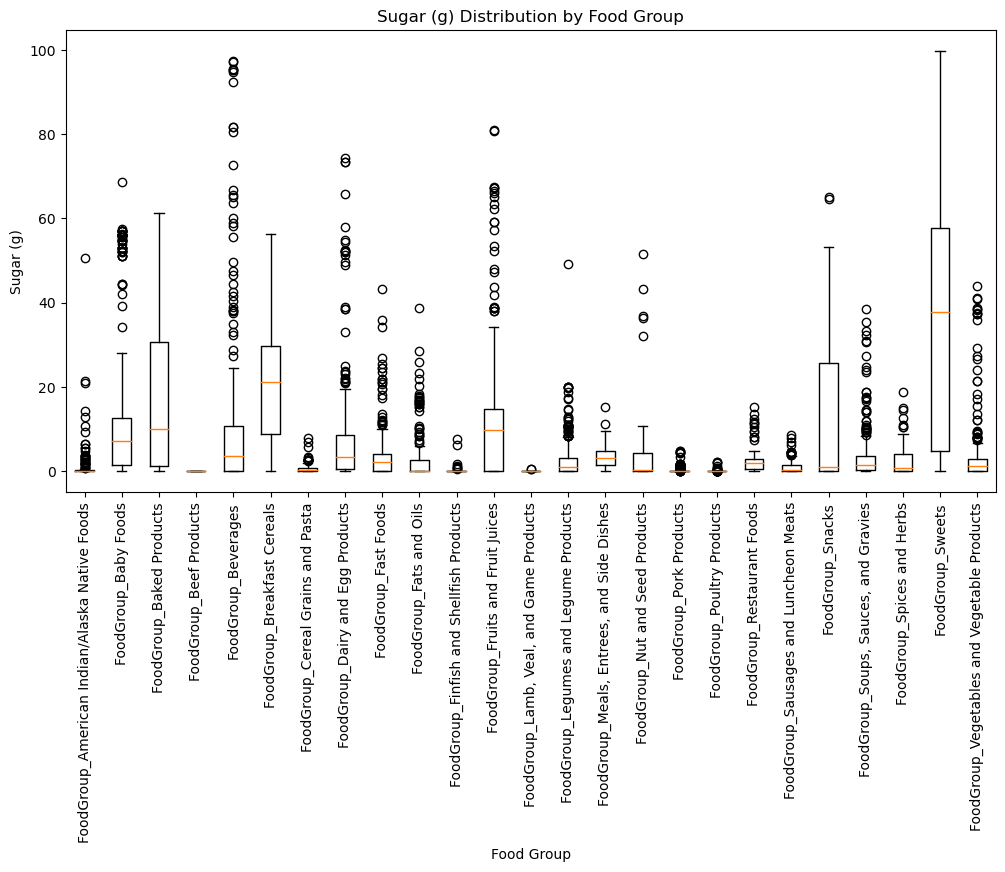

In [30]:
# Extracting the energy (kcal) values for each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
energy_values = [df.loc[df[col] == 1, 'Sugar_g'] for col in food_group_columns]

# Creating the box and whisker plot
plt.figure(figsize=(12, 6))
plt.boxplot(energy_values, labels=food_group_columns)

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Sugar (g)')
plt.title('Sugar (g) Distribution by Food Group')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


## Cycle 2 
Different dataset


- What is the average calorie content of the food items?
   72.541 
- Is there a correlation between the total fat content and the Sodium?
    Semmingly no relationship between fat and Sodium
    
- How does the serving size affect the calorie content of the food items? 
    Seemingly no effect as all serving size is 0
    
- What is the distribution of saturated fat across the food items?
    Positively skewed
    
- How many food items belong to the vegetable category?
       20

In [31]:
df2 = pd.read_csv('data/NutritionalFacts_Fruit_Vegetables_Seafood.csv')
df2

,Food and Serving,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,NaN,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),NaN
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ ounce ..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ ounce ..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ ounce ..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (7...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ ounce ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"Scallops, about 6 large or 14 small",140.0,10.0,1,2,310,13,430,12,5,...,27,2,0,4,14,0,0,65,22,"Seafood, Serving Size (84 g/3 oz)"
58,Shrimp,100.0,10.0,1.5,2,240,10,220,6,0,...,21,4,4,6,10,0,0,170,57,"Seafood, Serving Size (84 g/3 oz)"
59,Swordfish,120.0,50.0,6,9,100,4,310,9,0,...,16,2,2,0,6,1.5,8,40,13,"Seafood, Serving Size (84 g/3 oz)"
60,Tilapia,110.0,20.0,2.5,4,30,1,360,10,0,...,22,0,2,0,2,1,5,75,25,"Seafood, Serving Size (84 g/3 oz)"


### Checking datatypes for csv2

In [32]:
df2.dtypes

Food and Serving          object
Calories                 float64
Calories  from Fat       float64
Total Fat                 object
Total Fat.1               object
Sodium                    object
Sodium.1                  object
Potassium                 object
Potassium.1               object
Total Carbo-hydrate       object
Total Carbo-hydrate.1     object
Dietary Fiber             object
Dietary Fiber.1           object
Sugars                    object
Protein                   object
Vitamin A                 object
Vitamin C                 object
Calcium                   object
    Iron                  object
Saturated Fat             object
Saturated Fat.1           object
Chole-sterol              object
Chole-sterol.1            object
Food Type                 object
dtype: object

### Dealing with nulls

In [33]:
df2.isnull()

,Food and Serving,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# handling conflicting datatypes and missing values
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col].fillna(df2[col].mode()[0], inplace=True)
    else:
#         df2[col] = pd.to_numeric(df2[col], errors='coerce')
        df2[col].fillna(df2[col].mean(), inplace=True)
        
df2

,Food and Serving,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,"Apple, 1 large (242 g/8 oz)",72.540984,9.344262,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),"Seafood, Serving Size (84 g/3 oz)"
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.000000,0.000000,0,0,0,0,230,7,4,...,2,10,15,2,2,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.000000,0.000000,0,0,40,2,220,6,6,...,1,4,190,2,4,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.000000,0.000000,0.5,1,80,3,460,13,8,...,4,6,220,6,6,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (7...",30.000000,0.000000,0,0,60,3,250,7,7,...,1,110,10,2,2,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"Scallops, about 6 large or 14 small",140.000000,10.000000,1,2,310,13,430,12,5,...,27,2,0,4,14,0,0,65,22,"Seafood, Serving Size (84 g/3 oz)"
58,Shrimp,100.000000,10.000000,1.5,2,240,10,220,6,0,...,21,4,4,6,10,0,0,170,57,"Seafood, Serving Size (84 g/3 oz)"
59,Swordfish,120.000000,50.000000,6,9,100,4,310,9,0,...,16,2,2,0,6,1.5,8,40,13,"Seafood, Serving Size (84 g/3 oz)"
60,Tilapia,110.000000,20.000000,2.5,4,30,1,360,10,0,...,22,0,2,0,2,1,5,75,25,"Seafood, Serving Size (84 g/3 oz)"


## Dealing with possible not null conflicting types

In [35]:
from sklearn.preprocessing import LabelEncoder



# split the "Food and Serving" column into "Food" and "Serving" columns
df2[['Food', 'Serving']] = df2['Food and Serving'].str.split(',', n=1, expand=True)

# drop the original "Food and Serving" column
df2.drop('Food and Serving', axis=1, inplace=True)

def serving_size_to_float(serving_size):
    if serving_size is None:
        return float(0)
    try:
        return float(serving_size.strip(' g'))
    except ValueError:
        return float(0)


df2['Serving Size (g)'] = df2['Serving'].apply(serving_size_to_float)
df2.drop('Serving', axis=1, inplace=True)

# encode food names using label encoding
df2[['Food', 'Type']] = df2['Food Type'].str.split(',', n=1, expand=True)

le_food = LabelEncoder()
df2['Food Encoded'] = le_food.fit_transform(df2['Food'])
le_type = LabelEncoder()
df2['Type Encoded'] = le_type.fit_transform(df2['Type'])

# Print the modified dataframe
df2.head(10)



,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,...,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type,Food,Serving Size (g),Type,Food Encoded,Type Encoded
0,72.540984,9.344262,(g),(%DV),(g),(%DV),(g),(%DV),(g),(%DV),...,(%DV),(mg),(%DV),(mg),"Seafood, Serving Size (84 g/3 oz)",Seafood,0.0,Serving Size (84 g/3 oz),2,0
1,20.000000,0.000000,0,0,0,0,230,7,4,1,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
2,25.000000,0.000000,0,0,40,2,220,6,6,2,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
3,45.000000,0.000000,0.5,1,80,3,460,13,8,3,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
4,30.000000,0.000000,0,0,60,3,250,7,7,2,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
5,25.000000,0.000000,0,0,30,1,270,8,5,2,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
6,15.000000,0.000000,0,0,115,5,260,7,4,1,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
7,10.000000,0.000000,0,0,0,0,140,4,2,1,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
8,20.000000,0.000000,0,0,0,0,200,6,5,2,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1
9,25.000000,0.000000,0,0,20,1,190,5,5,2,...,0,0,40,13,"Vegetables, Serving Size (gram weight/ ounce ...",Vegetables,0.0,Serving Size (gram weight/ ounce weight),3,1


In [36]:

df2 = pd.get_dummies(df2, columns=['Food'])

df2.drop('Type', axis=1, inplace=True)
df2.drop('Food Type', axis=1, inplace=True)
df2 = df2.drop(0)


df2


,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,...,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Serving Size (g),Food Encoded,Type Encoded,Food_Fruits Serving Size (gram weight/ounce weight),Food_Fruits Serving Size (gram weight/ounce weight)),Food_Seafood,Food_Vegetables
1,20.0,0.0,0,0,0,0,230,7,4,1,...,0,40,13,0.0,3,1,0,0,0,1
2,25.0,0.0,0,0,40,2,220,6,6,2,...,0,40,13,0.0,3,1,0,0,0,1
3,45.0,0.0,0.5,1,80,3,460,13,8,3,...,0,40,13,0.0,3,1,0,0,0,1
4,30.0,0.0,0,0,60,3,250,7,7,2,...,0,40,13,0.0,3,1,0,0,0,1
5,25.0,0.0,0,0,30,1,270,8,5,2,...,0,40,13,0.0,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,140.0,10.0,1,2,310,13,430,12,5,2,...,0,65,22,0.0,2,0,0,0,1,0
58,100.0,10.0,1.5,2,240,10,220,6,0,0,...,0,170,57,0.0,2,0,0,0,1,0
59,120.0,50.0,6,9,100,4,310,9,0,0,...,8,40,13,0.0,2,0,0,0,1,0
60,110.0,20.0,2.5,4,30,1,360,10,0,0,...,5,75,25,0.0,2,0,0,0,1,0


In [37]:
df2.columns

Index(['Calories', 'Calories  from Fat', 'Total Fat', 'Total Fat.1', 'Sodium',
       'Sodium.1', 'Potassium', 'Potassium.1', 'Total Carbo-hydrate',
       'Total Carbo-hydrate.1', 'Dietary Fiber', 'Dietary Fiber.1', 'Sugars',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', '    Iron    ',
       'Saturated Fat', 'Saturated Fat.1', 'Chole-sterol', 'Chole-sterol.1',
       'Serving Size (g)', 'Food Encoded', 'Type Encoded',
       'Food_Fruits Serving  Size (gram  weight/ounce  weight)',
       'Food_Fruits Serving  Size (gram  weight/ounce  weight))',
       'Food_Seafood', 'Food_Vegetables'],
      dtype='object')

### Preparing predictive model + test/train data (2)

In [38]:
#Defining X and y
#try with total + grapph for serving size vs cal'
X = df2[['Total Fat','Total Carbo-hydrate','Saturated Fat','Chole-sterol','Sugars','Dietary Fiber','Sodium','Potassium']]
y = df2['Calories']

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {model2.score(X_train, y_train)}')
print(f'Testing Score: {model2.score(X_test, y_test)}')

Training Score: 0.8710409831936216
Testing Score: 0.8650958850248021


### Visualizations

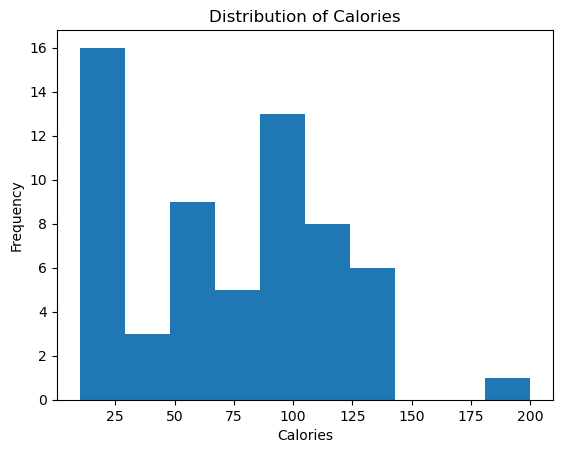

In [40]:
#Distribution of calories
plt.hist(df2['Calories'], bins=10)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

In [41]:
average_calories2 = df2['Calories'].mean()
average_calories2


72.54098360655738

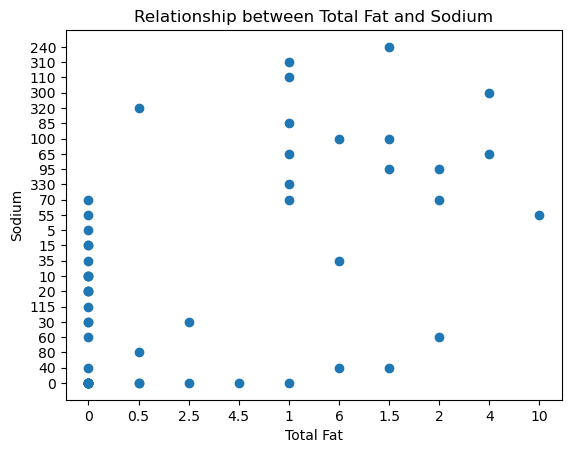

In [42]:
#Total Fat and Sodium

plt.scatter(df2['Total Fat'], df2['Sodium'])
plt.xlabel('Total Fat')
plt.ylabel('Sodium')
plt.title('Relationship between Total Fat and Sodium')
plt.show()


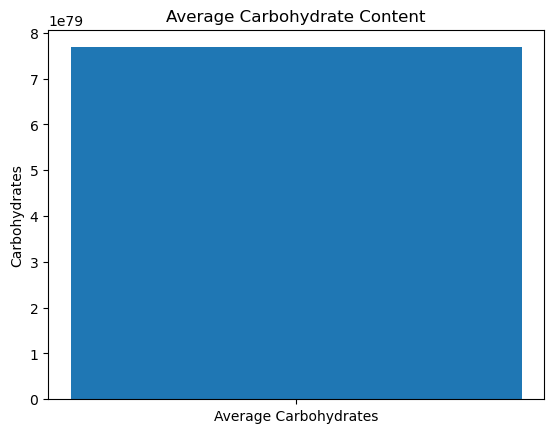

In [43]:
#Average Carbohydrate Content

average_carbohydrates = df2['Total Carbo-hydrate'].mean()
plt.bar(['Average Carbohydrates'], [average_carbohydrates])
plt.ylabel('Carbohydrates')
plt.title('Average Carbohydrate Content')
plt.show()


In [44]:
average_carbs2 = df2['Total Carbo-hydrate'].mean()
average_carbs2


7.684495987251004e+79

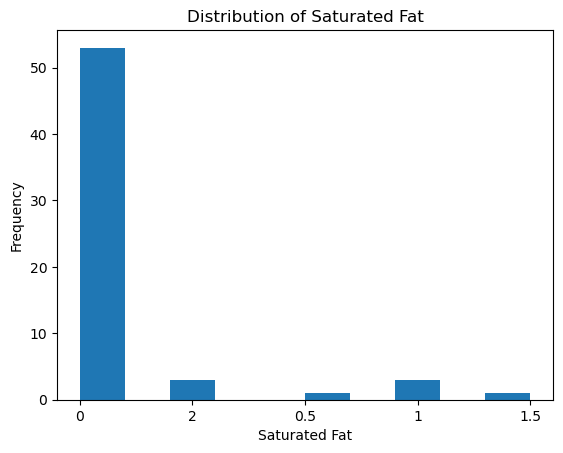

In [45]:
# Distribution of Saturated Fat
plt.hist(df2['Saturated Fat'], bins=10)
plt.xlabel('Saturated Fat')
plt.ylabel('Frequency')
plt.title('Distribution of Saturated Fat')
plt.show()


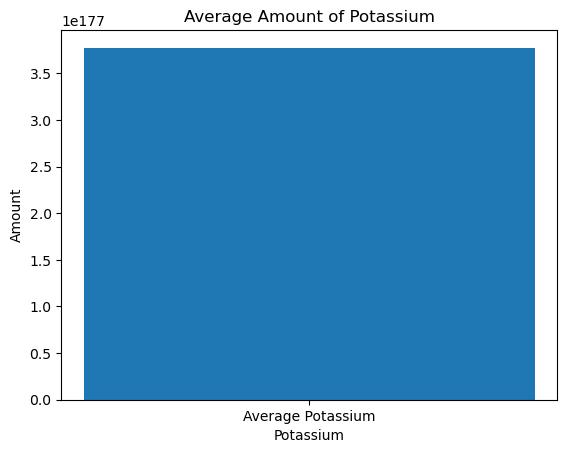

In [46]:
# Calculate the average amount of potassium
average_potassium = df2['Potassium'].mean()

# Create a bar plot
plt.bar('Average Potassium', average_potassium)

# Add labels and title
plt.xlabel('Potassium')
plt.ylabel('Amount')
plt.title('Average Amount of Potassium')

# Display the plot
plt.show()


In [47]:
Potassium = df2['Potassium'].mean()
Potassium


3.7741059057421356e+177

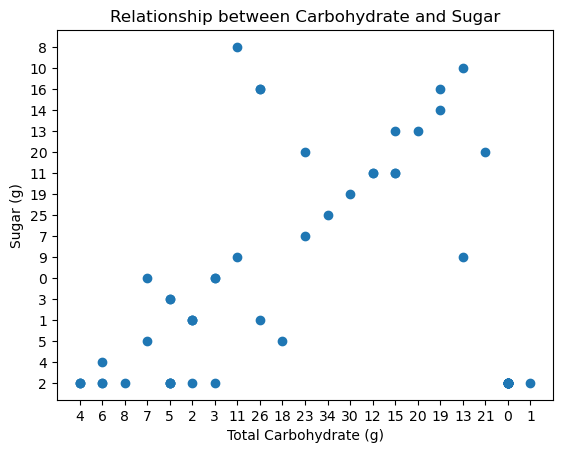

In [48]:
plt.scatter(df2['Total Carbo-hydrate'], df2['Sugars'])
plt.xlabel('Total Carbohydrate (g)')
plt.ylabel('Sugar (g)')
plt.title('Relationship between Carbohydrate and Sugar')
plt.show()


In [49]:
df2 

,Calories,Calories from Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,...,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Serving Size (g),Food Encoded,Type Encoded,Food_Fruits Serving Size (gram weight/ounce weight),Food_Fruits Serving Size (gram weight/ounce weight)),Food_Seafood,Food_Vegetables
1,20.0,0.0,0,0,0,0,230,7,4,1,...,0,40,13,0.0,3,1,0,0,0,1
2,25.0,0.0,0,0,40,2,220,6,6,2,...,0,40,13,0.0,3,1,0,0,0,1
3,45.0,0.0,0.5,1,80,3,460,13,8,3,...,0,40,13,0.0,3,1,0,0,0,1
4,30.0,0.0,0,0,60,3,250,7,7,2,...,0,40,13,0.0,3,1,0,0,0,1
5,25.0,0.0,0,0,30,1,270,8,5,2,...,0,40,13,0.0,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,140.0,10.0,1,2,310,13,430,12,5,2,...,0,65,22,0.0,2,0,0,0,1,0
58,100.0,10.0,1.5,2,240,10,220,6,0,0,...,0,170,57,0.0,2,0,0,0,1,0
59,120.0,50.0,6,9,100,4,310,9,0,0,...,8,40,13,0.0,2,0,0,0,1,0
60,110.0,20.0,2.5,4,30,1,360,10,0,0,...,5,75,25,0.0,2,0,0,0,1,0


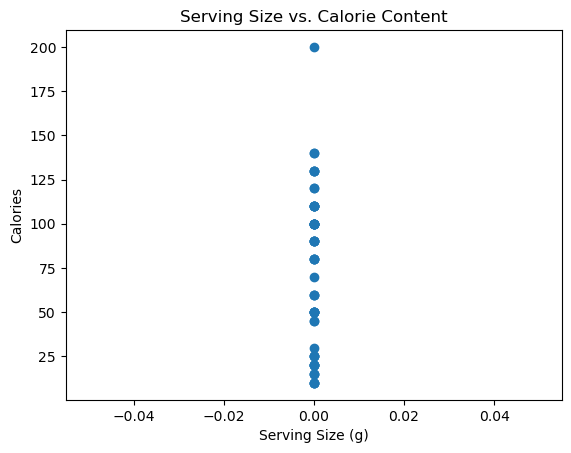

In [50]:
# Create a scatter plot
plt.scatter(df2['Serving Size (g)'], df2['Calories'])

# Add labels and title
plt.xlabel('Serving Size (g)')
plt.ylabel('Calories')
plt.title('Serving Size vs. Calorie Content')

# Display the plot
plt.show()


In [51]:
df2['Serving Size (g)'].value_counts
# df2.columns


<bound method IndexOpsMixin.value_counts of 1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
     ... 
57    0.0
58    0.0
59    0.0
60    0.0
61    0.0
Name: Serving Size (g), Length: 61, dtype: float64>

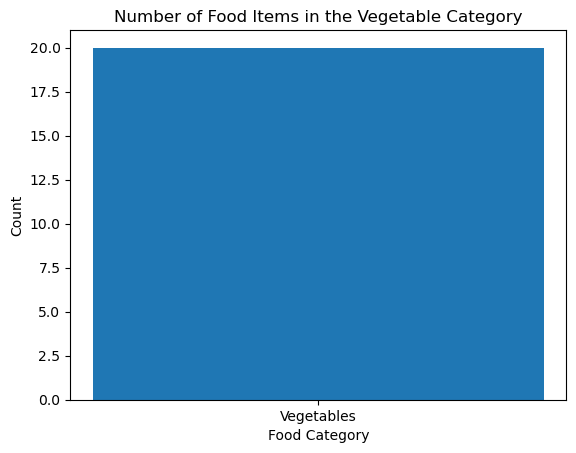

In [52]:
# Count the number of food items in the vegetable category
vegetable_count = df2['Food_Vegetables'].sum()

# Create a bar plot
plt.bar('Vegetables', vegetable_count)

# Add labels and title
plt.xlabel('Food Category')
plt.ylabel('Count')
plt.title('Number of Food Items in the Vegetable Category')

# Display the plot
plt.show()


In [53]:
df2['Food_Vegetables'].sum()

20

# API call part 1

In [54]:
# Needed to get access api without token
# pip install sodapy

In [55]:
import pandas as pd
from sodapy import Socrata

# Initialize the Socrata client
client = Socrata("chronicdata.cdc.gov", None)

# Retrieve the data from the API
results = client.get("nxst-x9p4", limit=2000)

# Convert the data to a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df

,year,quarter,locationabbr,locationdesc,topicdesc,policytopic,datasource,setting,title,status,...,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,enacteddate,effectivedate
0,2010,1,NY,New York,Obesity,Incentives,DNPAO,Community,State Fiscal Plan,Dead,...,38,LEG,002OB,029INC,002COM,1641,47,2092,NaN,NaN
1,2011,1,WV,West Virginia,Nutrition,Appropriations,DNPAO,Community,Sales Tax on Food,Dead,...,2,LEG,001NUT,002APP,002COM,4781,42,2749,NaN,NaN
2,2011,1,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,DNPAO,Community,Pedestrian Safety,Dead,...,68,LEG,003PA,049BED,002COM,4090,25,1919,NaN,NaN
3,2010,1,NC,North Carolina,Obesity,Menu Labeling,DNPAO,Community,Governors Budget,Dead,...,41,LEG,002OB,032MNL,002COM,2908,37,2390,NaN,NaN
4,2011,1,FL,Florida,Physical Activity,"Parks, Recreation and Trails",DNPAO,School/After School,Chronic Diseases<br>,Dead,...,59,LEG,003PA,034PRT,004SAS,5615,30,1112,2012-01-01T00:00:00.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2011,1,CO,Colorado,Obesity,Liability and Indemnity,DNPAO,Community,Sales Tax Exemption for Soft Drinks,Dead,...,39,LEG,002OB,030LAI,002COM,3602,9,1398,NaN,NaN
1996,2010,1,HI,Hawaii,Obesity,Appropriations,DNPAO,Community,Department of Transportation,Dead,...,28,LEG,002OB,002APP,002COM,2069,4,1657,NaN,NaN
1997,2011,1,NM,New Mexico,Obesity,Appropriations,DNPAO,Community,Local Food Systems,Enacted,...,28,LEG,002OB,002APP,002COM,4272,11,616,2011-01-01T00:00:00.000,NaN
1998,2016,2,CT,Connecticut,Nutrition,Agriculture and Farming,DNPAO,Community,An act concerning Connecticut's Farm to School...,Enacted,...,10,LEG,001NUT,017AGF,002COM,6979,24,1043,2016-05-27T00:00:00.000,2016-05-27T00:00:00.000


In [56]:
results_df.dtypes

year                           object
quarter                        object
locationabbr                   object
locationdesc                   object
topicdesc                      object
policytopic                    object
datasource                     object
setting                        object
title                          object
status                         object
citation                       object
statusaltvalue                 object
datatype                       object
comments                       object
geolocation                    object
displayorder                   object
policytypeid                   object
healthtopicid                  object
policytopicid                  object
settingid                      object
provisionid                    object
:@computed_region_bxsw_vy29    object
:@computed_region_he4y_prf8    object
enacteddate                    object
effectivedate                  object
dtype: object

In [57]:
results_df['year'].value_counts()

2011    626
2009    532
2010    442
2012     74
2013     67
2005     55
2007     44
2008     33
2015     25
2014     21
2003     18
2001     16
2004     15
2002     13
2016      9
2006      8
2017      2
Name: year, dtype: int64

In [58]:
results_df['quarter'].value_counts()

1    1954
2      21
3      16
4       9
Name: quarter, dtype: int64

In [59]:
results_df['title'].value_counts()

School Nutrition                       19
Capital Improvements                   11
Farmers Markets                        11
Student Nutrition and Wellness         11
Transportation System Modernization    11
                                       ..
Agency Ancillary Funds                  1
Quiet Vehicles Task Force               1
Consumer Protection                     1
Government Funding                      1
Local Food Systems                      1
Name: title, Length: 1297, dtype: int64

In [60]:
school_nutrition_df = results_df[results_df['title'] == 'School Nutrition']
school_nutrition_df

,year,quarter,locationabbr,locationdesc,topicdesc,policytopic,datasource,setting,title,status,...,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,enacteddate,effectivedate
26,2009,1,MA,Massachusetts,Nutrition,School Nutrition,DNPAO,School/After School,School Nutrition,Dead,...,21,LEG,001NUT,043SNU,004SAS,2693,25,1919,NaN,NaN
35,2010,1,MA,Massachusetts,Nutrition,School Nutrition,DNPAO,School/After School,School Nutrition,Dead,...,21,LEG,001NUT,043SNU,004SAS,293,25,1919,NaN,NaN
140,2009,1,MA,Massachusetts,Obesity,Disparities/Equity,DNPAO,Community,School Nutrition,Dead,...,32,LEG,002OB,013DEQ,002COM,2693,25,1919,NaN,NaN
142,2009,1,MA,Massachusetts,Physical Activity,Physical Activity Requirements,DNPAO,School/After School,School Nutrition,Dead,...,60,LEG,003PA,035PAR,004SAS,2693,25,1919,NaN,NaN
162,2009,1,MA,Massachusetts,Obesity,Food Restrictions,DNPAO,Community,School Nutrition,Dead,...,35,LEG,002OB,020FOR,002COM,2693,25,1919,NaN,NaN
184,2009,1,MA,Massachusetts,Obesity,Health Insurance Coverage,DNPAO,Community,School Nutrition,Dead,...,37,LEG,002OB,028HIC,002COM,2693,25,1919,NaN,NaN
228,2009,1,MA,Massachusetts,Obesity,Task Forces/Councils,DNPAO,School/After School,School Nutrition,Dead,...,44,LEG,002OB,047TFC,004SAS,2693,25,1919,NaN,NaN
354,2009,1,MA,Massachusetts,Nutrition,Food Security,DNPAO,Community,School Nutrition,Dead,...,14,LEG,001NUT,023FOS,002COM,1109,25,1919,NaN,NaN
454,2011,1,MS,Mississippi,Nutrition,Access to Healthy Foods,DNPAO,School/After School,School Nutrition,Dead,...,1,LEG,001NUT,001AHF,004SAS,4169,32,494,NaN,NaN
760,2010,1,MA,Massachusetts,Obesity,Health Insurance Coverage,DNPAO,School/After School,School Nutrition,Dead,...,37,LEG,002OB,028HIC,004SAS,2686,25,1919,NaN,NaN


In [61]:
school_nutrition_df = results_df[results_df['title'] == 'Student Nutrition and Wellness']
school_nutrition_df

,year,quarter,locationabbr,locationdesc,topicdesc,policytopic,datasource,setting,title,status,...,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,enacteddate,effectivedate
22,2009,1,MA,Massachusetts,Obesity,Body Mass Index (BMI),DNPAO,School/After School,Student Nutrition and Wellness,Dead,...,29,LEG,002OB,006BMI,004SAS,2689,25,1919,NaN,NaN
79,2009,1,MA,Massachusetts,Nutrition,School Nutrition,DNPAO,Community,Student Nutrition and Wellness,Dead,...,21,LEG,001NUT,043SNU,002COM,2689,25,1919,NaN,NaN
101,2009,1,MA,Massachusetts,Nutrition,Nutrition Standards,DNPAO,School/After School,Student Nutrition and Wellness,Dead,...,6,LEG,001NUT,010NUS,004SAS,2689,25,1919,NaN,NaN
153,2009,1,MA,Massachusetts,Obesity,Appropriations,DNPAO,Community,Student Nutrition and Wellness,Dead,...,28,LEG,002OB,002APP,002COM,2689,25,1919,NaN,NaN
188,2009,1,MA,Massachusetts,Nutrition,Farm Direct Foods,DNPAO,Community,Student Nutrition and Wellness,Dead,...,8,LEG,001NUT,015FDF,002COM,2689,25,1919,NaN,NaN
255,2009,1,MA,Massachusetts,Nutrition,Task Forces/Councils,DNPAO,Community,Student Nutrition and Wellness,Dead,...,23,LEG,001NUT,047TFC,002COM,2689,25,1919,NaN,NaN
294,2009,1,MA,Massachusetts,Nutrition,Nutrition Standards,DNPAO,School/After School,Student Nutrition and Wellness,Dead,...,6,LEG,001NUT,010NUS,004SAS,255,25,1919,NaN,NaN
1138,2009,1,MA,Massachusetts,Physical Activity,Task Forces/Councils,DNPAO,Community,Student Nutrition and Wellness,Dead,...,67,LEG,003PA,047TFC,002COM,2689,25,1919,NaN,NaN
1176,2009,1,MA,Massachusetts,Physical Activity,Bicycling,DNPAO,School/After School,Student Nutrition and Wellness,Dead,...,50,LEG,003PA,005BIK,004SAS,255,25,1919,NaN,NaN
1526,2009,1,MA,Massachusetts,Nutrition,School Nutrition,DNPAO,Community,Student Nutrition and Wellness,Dead,...,21,LEG,001NUT,043SNU,002COM,255,25,1919,NaN,NaN


##  API part 2

In [62]:
url = "https://chronicdata.cdc.gov/resource/hn4x-zwk7.json"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Converting the response to JSON format
    data = response.json()

    # Creainge a DataFrame from the JSON data
    api_df = pd.DataFrame(data)

    # Displaying the DataFrame
    display(api_df)
else:
    #message if not found
    print("Failed to retrieve data from the API endpoint.")


,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,education,gender,income,total,race_ethnicity,data_value_footnote_symbol,data_value_footnote
0,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,Value,44.8,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,25.4,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.5,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,19.3,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,24.7,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,Value,45.5,...,AGEYR4554,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,15.2,...,AGEYR4554,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,25.6,...,AGEYR4554,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,39.6,...,AGEYR4554,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
api_df.dtypes

yearstart                      object
yearend                        object
locationabbr                   object
locationdesc                   object
datasource                     object
class                          object
topic                          object
question                       object
data_value_type                object
data_value                     object
data_value_alt                 object
low_confidence_limit           object
high_confidence_limit          object
sample_size                    object
age_years                      object
geolocation                    object
classid                        object
topicid                        object
questionid                     object
datavaluetypeid                object
locationid                     object
stratificationcategory1        object
stratification1                object
stratificationcategoryid1      object
stratificationid1              object
:@computed_region_bxsw_vy29    object
:@computed_r

In [64]:
api_df['question'].value_counts()

Percent of adults who report consuming fruit less than one time daily              200
Percent of adults aged 18 years and older who have obesity                         200
Percent of adults aged 18 years and older who have an overweight classification    200
Percent of adults who engage in no leisure-time physical activity                  200
Percent of adults who report consuming vegetables less than one time daily         200
Name: question, dtype: int64

In [65]:
questions = api_df[api_df['question'] == 'Percent of adults who report consuming vegetables less than one time daily']
questions

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_type,data_value,...,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,education,gender,income,total,race_ethnicity,data_value_footnote_symbol,data_value_footnote
4,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,24.7,...,AGEYR1824,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,20.3,...,AGEYR2534,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,16.7,...,AGEYR3544,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,19.5,...,AGEYR4554,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2021,2021,AL,Alabama,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,21.2,...,AGEYR5564,29,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2021,2021,CT,Connecticut,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,16.2,...,RACEWHT,24,1043,NaN,NaN,NaN,NaN,Non-Hispanic White,NaN,NaN
981,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,35.9,...,AGEYR1824,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,24.1,...,AGEYR2534,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,2021,2021,DE,Delaware,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,Value,20.4,...,AGEYR3544,43,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
api_df[':@computed_region_he4y_prf8'].value_counts()


94      140
1673    140
986     140
998     140
1340    140
1398    140
1043    140
1046     20
Name: :@computed_region_he4y_prf8, dtype: int64

In [67]:
api_df['income'].value_counts()


$15,000 - $24,999     35
$25,000 - $34,999     35
$35,000 - $49,999     35
$50,000 - $74,999     35
$75,000 or greater    35
Less than $15,000     35
Data not reported     35
Name: income, dtype: int64

In [68]:
api_df['gender'].value_counts()


Female    35
Male      35
Name: gender, dtype: int64

In [69]:
api_df['class'].value_counts()


Fruits and Vegetables      400
Obesity / Weight Status    400
Physical Activity          200
Name: class, dtype: int64

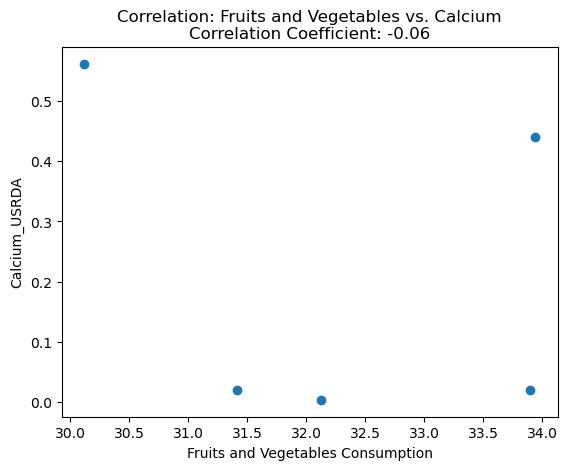

In [70]:
# Convert 'data_value' column to numeric type
api_df['data_value'] = pd.to_numeric(api_df['data_value'], errors='coerce')

# Filter data from api_df for "Fruits and Vegetables" class
filtered_data = api_df[api_df['class'] == 'Fruits and Vegetables']

# Calculate the average consumption by location
aggregated_data = filtered_data.groupby('locationdesc')['data_value'].mean().reset_index()

# Calculate correlation
correlation = aggregated_data['data_value'].corr(df['Calcium_USRDA'])

# Create scatter plot
plt.scatter(aggregated_data['data_value'][:5], df['Calcium_USRDA'][:5])
plt.xlabel('Fruits and Vegetables Consumption')
plt.ylabel('Calcium_USRDA')
plt.title(f'Correlation: Fruits and Vegetables vs. Calcium\nCorrelation Coefficient: {correlation:.2f}')
plt.show()


In [71]:
df.columns

Index(['ID', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'Energy_kcal',
       'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g',
       ...
       'FoodGroup_Nut and Seed Products', 'FoodGroup_Pork Products',
       'FoodGroup_Poultry Products', 'FoodGroup_Restaurant Foods',
       'FoodGroup_Sausages and Luncheon Meats', 'FoodGroup_Snacks',
       'FoodGroup_Soups, Sauces, and Gravies', 'FoodGroup_Spices and Herbs',
       'FoodGroup_Sweets', 'FoodGroup_Vegetables and Vegetable Products'],
      dtype='object', length=537)

In [72]:
df2.T

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
Calories,20.0,25.0,45.0,30.0,25.0,15.0,10.0,20.0,25.0,10.0,...,90.0,140.0,110.0,200.0,130.0,140.0,100.0,120.0,110.0,130.0
Calories from Fat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,50.0,15.0,90.0,40.0,10.0,10.0,50.0,20.0,15.0
Total Fat,0,0,0.5,0,0,0,0,0,0,0,...,1,6,2,10,4,1,1.5,6,2.5,1.5
Total Fat.1,0,0,1,0,0,0,0,0,0,0,...,2,9,3,15,6,2,2,9,4,2
Sodium,0,40,80,60,30,115,0,0,20,10,...,110,35,70,55,65,310,240,100,30,40
Sodium.1,0,2,3,3,1,5,0,0,1,0,...,5,1,3,2,3,13,10,4,1,2
Potassium,230,220,460,250,270,260,140,200,190,70,...,370,370,440,430,420,430,220,310,360,480
Potassium.1,7,6,13,7,8,7,4,6,5,2,...,11,11,13,12,12,12,6,9,10,14
Total Carbo-hydrate,4,6,8,7,5,4,2,5,5,2,...,0,0,0,0,0,5,0,0,0,0
Total Carbo-hydrate.1,1,2,3,2,2,1,1,2,2,1,...,0,0,0,0,0,2,0,0,0,0


In [73]:
api_df.T


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
yearstart,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
yearend,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
locationabbr,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,DE,DE,DE,DE,DE,DE,DE,DE,DE,DE
locationdesc,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware
datasource,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,...,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System
class,Fruits and Vegetables,Obesity / Weight Status,Obesity / Weight Status,Physical Activity,Fruits and Vegetables,Fruits and Vegetables,Physical Activity,Obesity / Weight Status,Obesity / Weight Status,Fruits and Vegetables,...,Physical Activity,Obesity / Weight Status,Fruits and Vegetables,Obesity / Weight Status,Fruits and Vegetables,Fruits and Vegetables,Fruits and Vegetables,Physical Activity,Obesity / Weight Status,Obesity / Weight Status
topic,Fruits and Vegetables - Behavior,Obesity / Weight Status,Obesity / Weight Status,Physical Activity - Behavior,Fruits and Vegetables - Behavior,Fruits and Vegetables - Behavior,Physical Activity - Behavior,Obesity / Weight Status,Obesity / Weight Status,Fruits and Vegetables - Behavior,...,Physical Activity - Behavior,Obesity / Weight Status,Fruits and Vegetables - Behavior,Obesity / Weight Status,Fruits and Vegetables - Behavior,Fruits and Vegetables - Behavior,Fruits and Vegetables - Behavior,Physical Activity - Behavior,Obesity / Weight Status,Obesity / Weight Status
question,Percent of adults who report consuming fruit l...,Percent of adults aged 18 years and older who ...,Percent of adults aged 18 years and older who ...,Percent of adults who engage in no leisure-tim...,Percent of adults who report consuming vegetab...,Percent of adults who report consuming fruit l...,Percent of adults who engage in no leisure-tim...,Percent of adults aged 18 years and older who ...,Percent of adults aged 18 years and older who ...,Percent of adults who report consuming vegetab...,...,Percent of adults who engage in no leisure-tim...,Percent of adults aged 18 years and older who ...,Percent of adults who report consuming vegetab...,Percent of adults aged 18 years and older who ...,Percent of adults who report consuming fruit l...,Percent of adults who report consuming fruit l...,Percent of adults who report consuming vegetab...,Percent of adults who engage in no leisure-tim...,Percent of adults aged 18 years and older who ...,Percent of adults aged 18 years and older who ...
data_value_type,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
data_value,44.8,25.4,28.5,19.3,24.7,49.4,23.3,46.6,21.1,20.3,...,22.3,35.5,20.4,38.3,39.8,45.5,15.2,25.6,39.6,33.9


## Attempting visuals that pull everything together

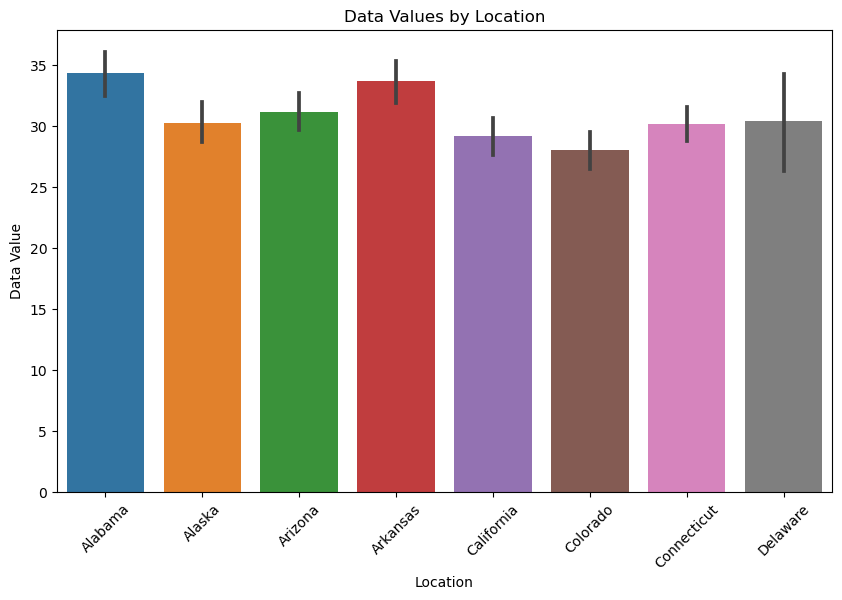

In [74]:
api_df['data_value'] = pd.to_numeric(api_df['data_value'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.barplot(x='locationdesc', y='data_value', data=api_df)
plt.xlabel('Location')
plt.ylabel('Data Value')
plt.title('Data Values by Location')
plt.xticks(rotation=45)
plt.show()


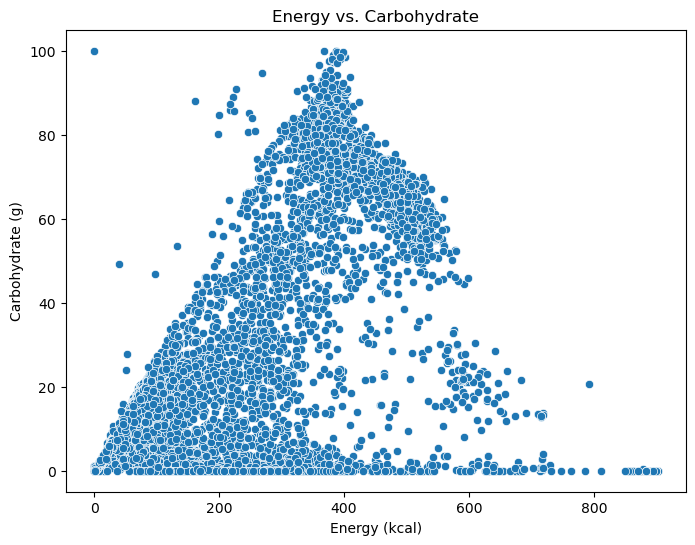

In [75]:
df['Energy_kcal'] = pd.to_numeric(df['Energy_kcal'], errors='coerce')
df['Carb_g'] = pd.to_numeric(df['Carb_g'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Energy_kcal', y='Carb_g', data=df)
plt.xlabel('Energy (kcal)')
plt.ylabel('Carbohydrate (g)')
plt.title('Energy vs. Carbohydrate')
plt.show()


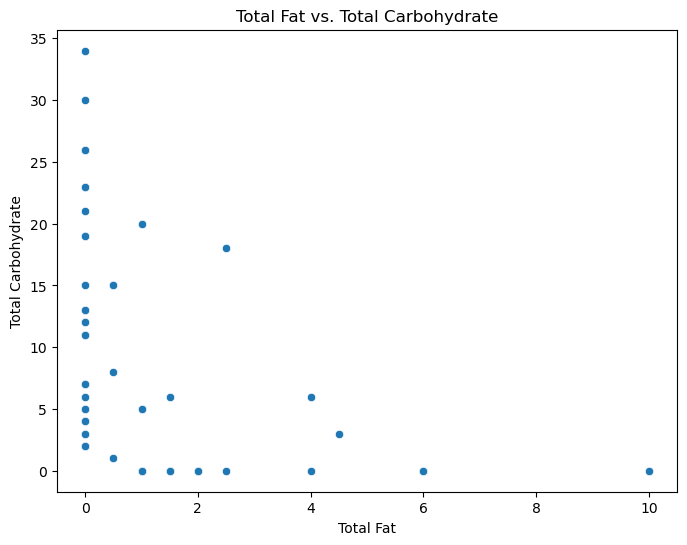

In [76]:
df2['Total Fat'] = pd.to_numeric(df2['Total Fat'], errors='coerce')
df2['Total Carbo-hydrate'] = pd.to_numeric(df2['Total Carbo-hydrate'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Fat', y='Total Carbo-hydrate', data=df2)
plt.xlabel('Total Fat')
plt.ylabel('Total Carbohydrate')
plt.title('Total Fat vs. Total Carbohydrate')
plt.show()


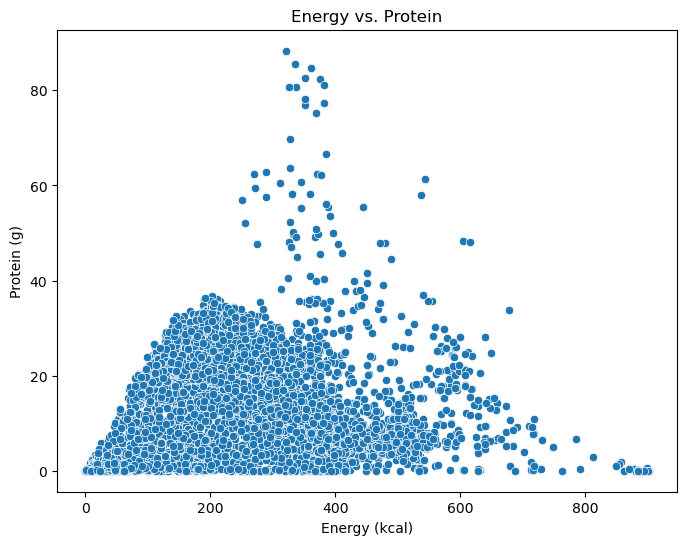

In [77]:
df['Energy_kcal'] = pd.to_numeric(df['Energy_kcal'], errors='coerce')
df['Protein_g'] = pd.to_numeric(df['Protein_g'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Energy_kcal', y='Protein_g', data=df)
plt.xlabel('Energy (kcal)')
plt.ylabel('Protein (g)')
plt.title('Energy vs. Protein')
plt.show()


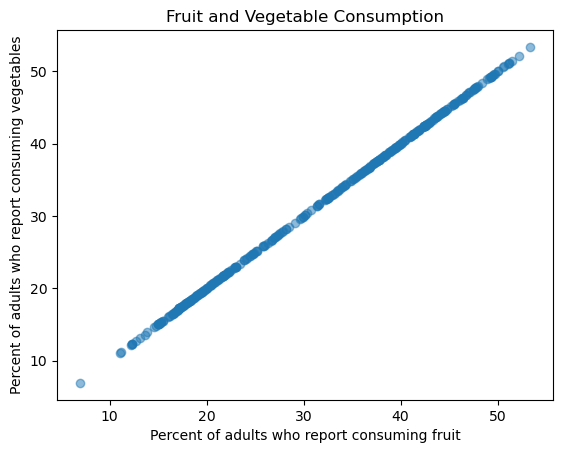

In [78]:
fruits_data = api_df[api_df['topic'] == 'Fruits and Vegetables - Behavior']
vegetables_data = api_df[api_df['topic'] == 'Fruits and Vegetables - Behavior']

plt.scatter(fruits_data['data_value'], vegetables_data['data_value'], alpha=0.5)
plt.xlabel('Percent of adults who report consuming fruit')
plt.ylabel('Percent of adults who report consuming vegetables')
plt.title('Fruit and Vegetable Consumption')
plt.show()


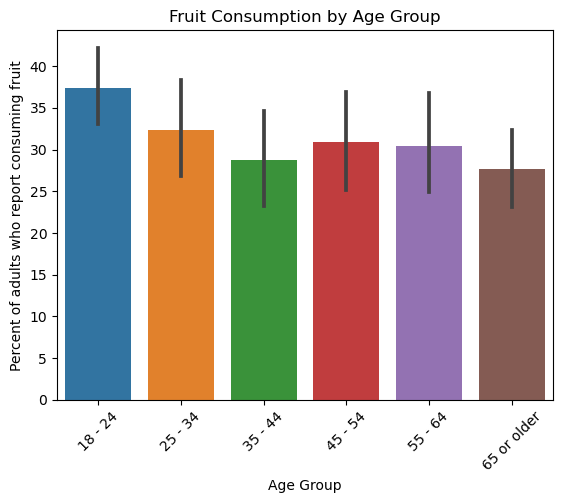

In [79]:
sns.barplot(x='age_years', y='data_value', data=api_df[api_df['topic'] == 'Fruits and Vegetables - Behavior'])
plt.xlabel('Age Group')
plt.ylabel('Percent of adults who report consuming fruit')
plt.title('Fruit Consumption by Age Group')
plt.xticks(rotation=45)
plt.show()


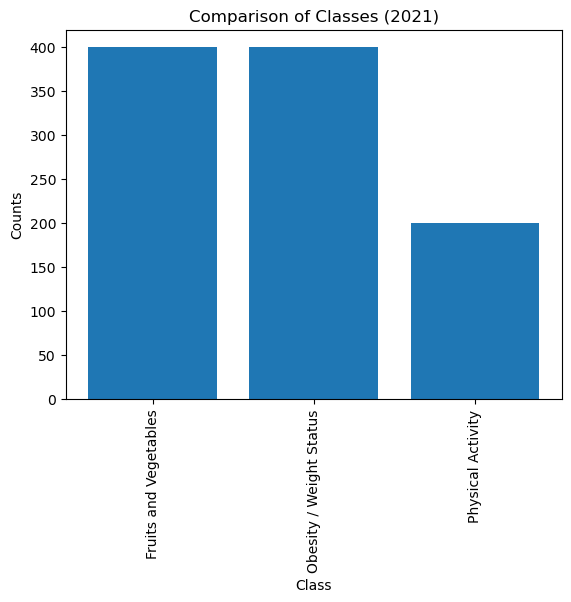

In [88]:
# Filter data for the year 2021
data_2021 = api_df[api_df['yearstart'] == 2021]

# Get the counts for each class
class_counts = api_df['class'].value_counts()

# Create a bar graph
plt.bar(class_counts.index, class_counts.values)

plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Comparison of Classes (2021)')
plt.xticks(rotation=90)
plt.show()


In [81]:
api_df[api_df['class'] == 'Obesity / Weight Status']
api_df['yearstart'].value_counts()


2021    1000
Name: yearstart, dtype: int64

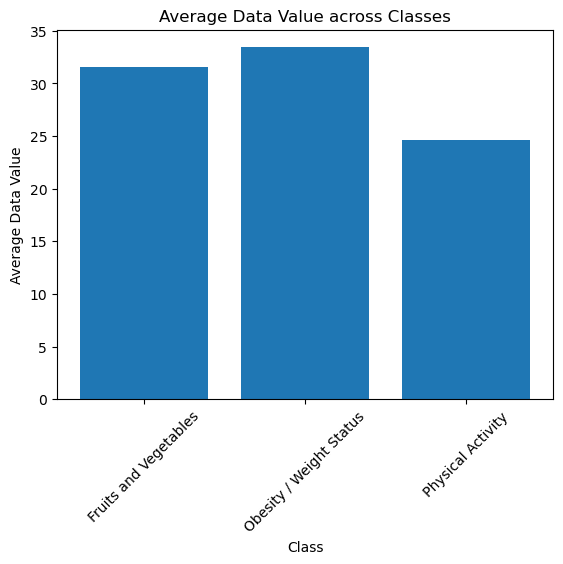

In [82]:
average_values = api_df.groupby('class')['data_value'].mean()

plt.bar(average_values.index, average_values)

plt.xlabel('Class')
plt.ylabel('Average Data Value')
plt.title('Average Data Value across Classes')
plt.xticks(rotation=45)
plt.show()


C:\Users\JaneelAbrahams\AppData\Local\Temp\ipykernel_37388\221225387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = api_df[['data_value', 'sample_size', 'low_confidence_limit', 'high_confidence_limit']].corr()


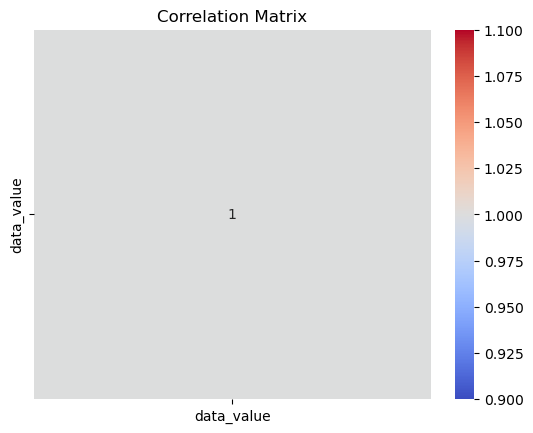

In [83]:
corr_matrix = api_df[['data_value', 'sample_size', 'low_confidence_limit', 'high_confidence_limit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [97]:
# Filter the DataFrame to include only rows with valid geolocation data
filtered_df = api_df.dropna(subset=['geolocation'])

# Extract latitude and longitude values from the geolocation column
latitude = filtered_df['geolocation'].apply(lambda x: x['latitude']).astype(float)
longitude = filtered_df['geolocation'].apply(lambda x: x['longitude']).astype(float)

# Count the occurrences of each class
class_counts = api_df['class'].value_counts()

# Create a list of tooltips with the count of each class
tooltips = [f'{class_name}: {count}' for class_name, count in class_counts.items()]

# Create a scatter mapbox plot using latitude and longitude with tooltips
fig = go.Figure(go.Scattermapbox(
    mode='markers',
    lat=latitude,
    lon=longitude,
    marker=go.scattermapbox.Marker(
        size=9,
        color='rgb(0, 102, 255)',
        opacity=0.7
    ),
    text=tooltips,  # Use the tooltips list as the text values
    hoverinfo='text'
))

# Set the layout of the plot
fig.update_layout(
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiamFuZWVsIiwiYSI6ImNsaHpjZGczMTAyYTAzZ214eW55c29pNHQifQ.H7B93JCW13pLc_vKvwqjnw', #public token
        center=dict(lat=37.0902, lon=-95.7129),  # Set the initial center of the map
        zoom=3  # Set the initial zoom level
    ),
    showlegend=False
)

# Display the interactive plot
fig.show()


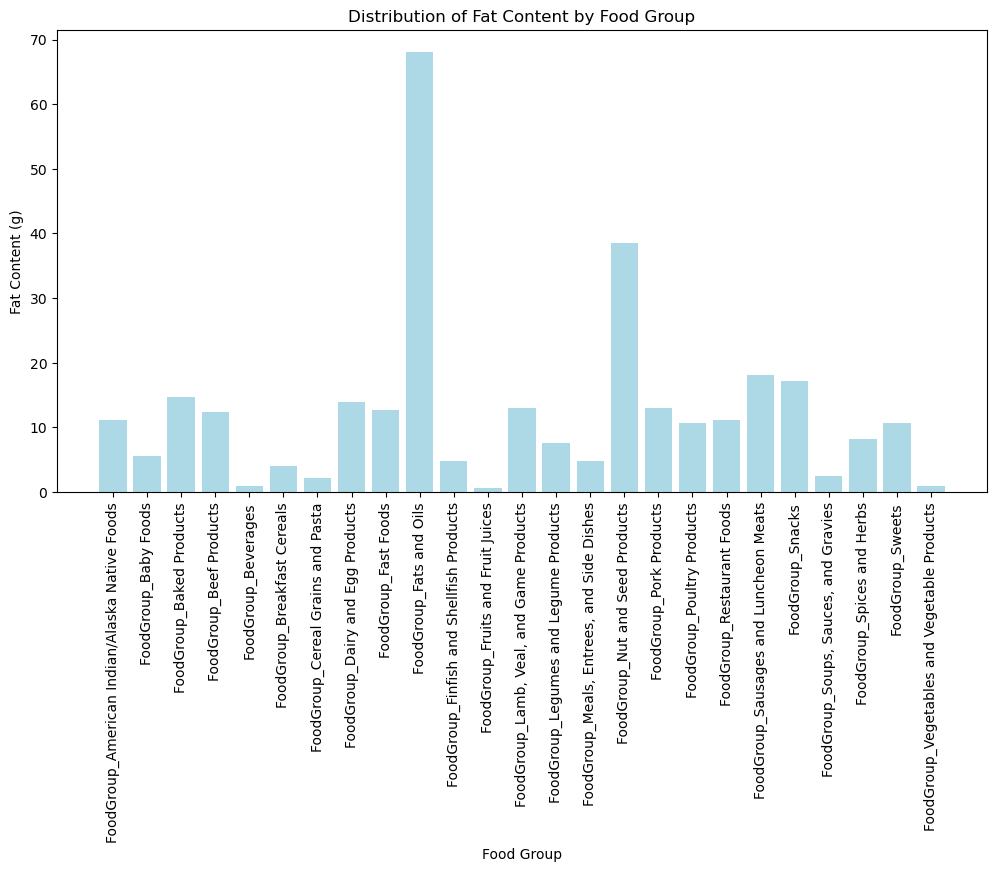

In [85]:
#CHANGE FOR DIFFERENT NUTRIENT THAT APPLY TO THIS FORMAT 

# Extracting the fat content values for each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
fat_values = [df.loc[df[col] == 1, 'Fat_g'] for col in food_group_columns]

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(food_group_columns, [value.mean() for value in fat_values], color='lightblue')

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Fat Content (g)')
plt.title('Distribution of Fat Content by Food Group')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()
